# FNC 6.2 Euler's method
This notebook solves Exercise 2 parts (a)–(g):
1) For each IVP, plot the Euler solution with `n=320`.
2) Do a convergence study for `n = 10*2^k, k=2..10`, plotting the final-time error vs `n` on log–log axes, including an `O(n^{-1})` guide line.

We implement a clean, fixed-step Euler solver following the textbook's formula.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def euler(f, tspan, u0, n):
    '''
    Fixed-step explicit Euler for u' = f(t, u).
    Returns t (N,), u (N,).
    '''
    a, b = float(tspan[0]), float(tspan[1])
    h = (b - a) / n
    t = a + h*np.arange(n+1)
    u = np.empty(n+1, dtype=float)
    u[0] = float(u0)
    for i in range(n):
        u[i+1] = u[i] + h * f(t[i], u[i])
    return t, u

def lineplot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(6,4))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def conv_plot(ns, errs, title):
    plt.figure(figsize=(6,4))
    plt.loglog(ns, errs, marker='o', linestyle='-')
    ref = errs[0] * (np.array(ns)/ns[0])**(-1)
    plt.loglog(ns, ref, linestyle='--', label=r"$O(n^{-1})$")
    plt.title(title)
    plt.xlabel("n (number of steps)")
    plt.ylabel("final-time error")
    plt.grid(True, which="both")
    plt.legend()
    plt.show()

## (a) $u' = -2tu$, $t\in[0,2]$, $u(0)=2$, exact $\hat{u}(t)=2e^{-t^2}$

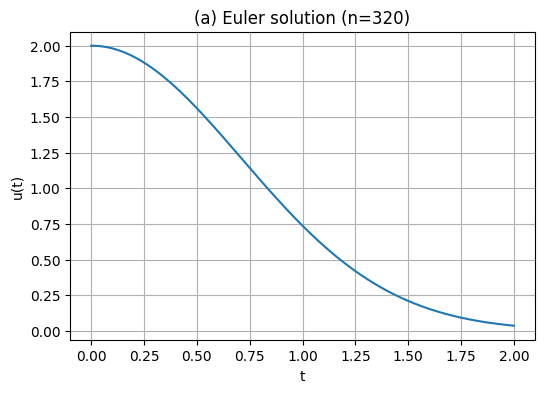

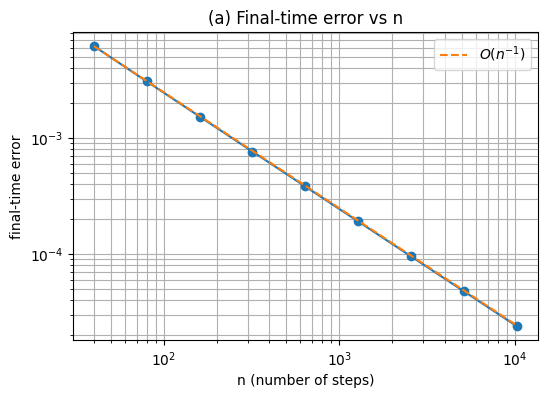

In [2]:
f = lambda t, u: -2.0*t*u
u_exact = lambda t: 2.0*np.exp(-t*t)
tspan = (0.0, 2.0)

t, u = euler(f, tspan, 2.0, 320)
lineplot(t, u, "(a) Euler solution (n=320)", "t", "u(t)")

ns = [10*(2**k) for k in range(2, 11)]
errs = []
for n in ns:
    t, u = euler(f, tspan, 2.0, n)
    errs.append(abs(u_exact(t[-1]) - u[-1]))
conv_plot(ns, errs, "(a) Final-time error vs n")

## (b) $u' = u + t$, $t\in[0,1]$, $u(0)=2$, exact $\hat{u}(t)=-1-t+3e^t$

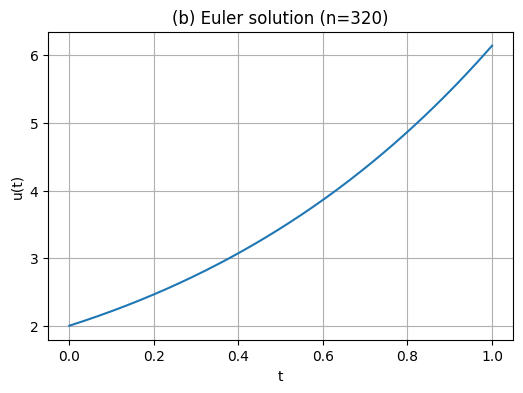

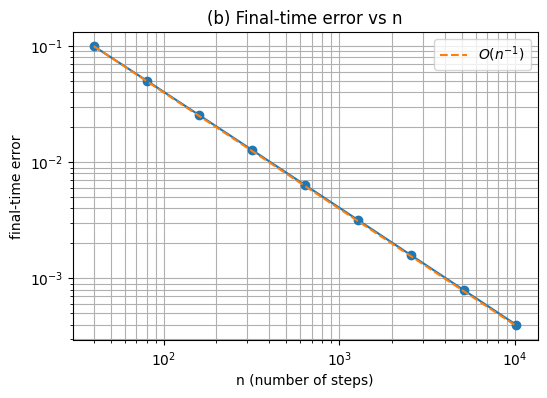

In [3]:
f = lambda t, u: u + t
u_exact = lambda t: -1.0 - t + 3.0*np.exp(t)
tspan = (0.0, 1.0)

t, u = euler(f, tspan, 2.0, 320)
lineplot(t, u, "(b) Euler solution (n=320)", "t", "u(t)")

ns = [10*(2**k) for k in range(2, 11)]
errs = []
for n in ns:
    t, u = euler(f, tspan, 2.0, n)
    errs.append(abs(u_exact(t[-1]) - u[-1]))
conv_plot(ns, errs, "(b) Final-time error vs n")

## (c) $(1+t^3)uu'=t^2$, $t\in[0,3]$, $u(0)=1$, exact $\hat{u}(t)=\sqrt{1+(2/3)\ln(1+t^3)}$

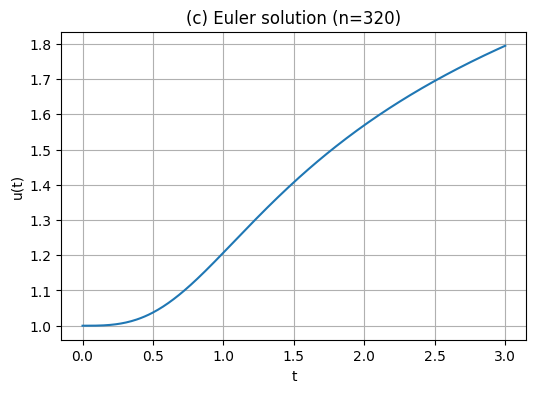

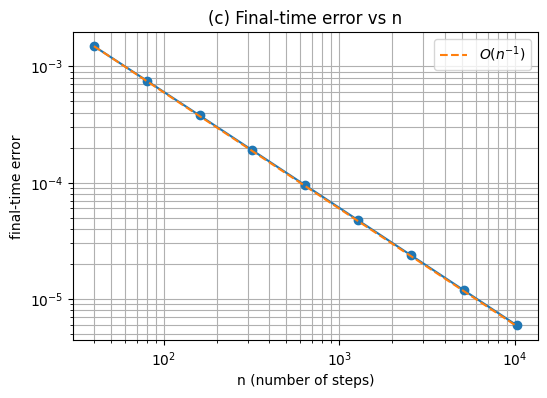

In [4]:
f = lambda t, u: (t**2)/((1.0 + t**3)*u)
u_exact = lambda t: np.sqrt(1.0 + (2.0/3.0)*np.log(1.0 + t**3))
tspan = (0.0, 3.0)

t, u = euler(f, tspan, 1.0, 320)
lineplot(t, u, "(c) Euler solution (n=320)", "t", "u(t)")

ns = [10*(2**k) for k in range(2, 11)]
errs = []
for n in ns:
    t, u = euler(f, tspan, 1.0, n)
    errs.append(abs(u_exact(t[-1]) - u[-1]))
conv_plot(ns, errs, "(c) Final-time error vs n")

## (d) $u' = 2u(1-u)$, $t\in[0,2]$, $u(0)=1/2$, exact $\hat{u}(t)=1/(1+e^{-2t})$

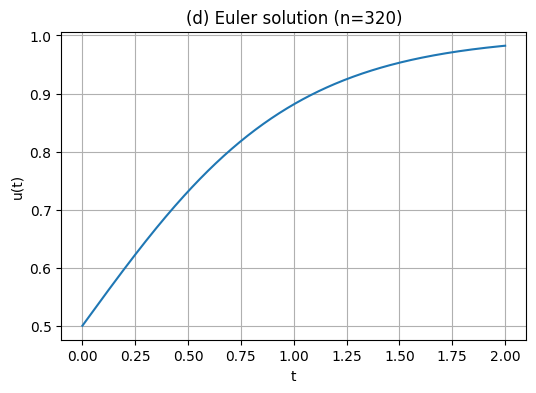

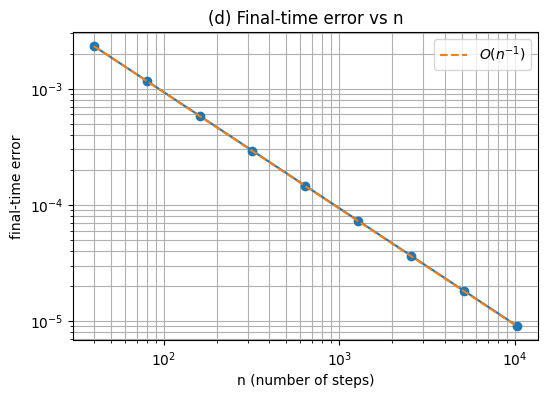

In [5]:
f = lambda t, u: 2.0*u*(1.0 - u)
u_exact = lambda t: 1.0/(1.0 + np.exp(-2.0*t))
tspan = (0.0, 2.0)

t, u = euler(f, tspan, 0.5, 320)
lineplot(t, u, "(d) Euler solution (n=320)", "t", "u(t)")

ns = [10*(2**k) for k in range(2, 11)]
errs = []
for n in ns:
    t, u = euler(f, tspan, 0.5, n)
    errs.append(abs(u_exact(t[-1]) - u[-1]))
conv_plot(ns, errs, "(d) Final-time error vs n")

## (e) $v' = (1+x^2)v$, $x\in[1,3]$, $v(1)=1$, exact $\hat{v}(x)=\exp\{(x^3+3x-4)/3\}$

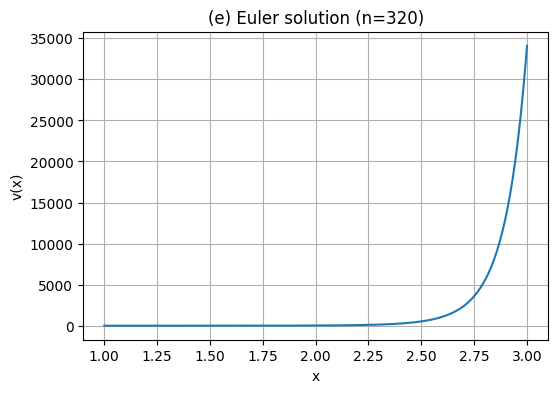

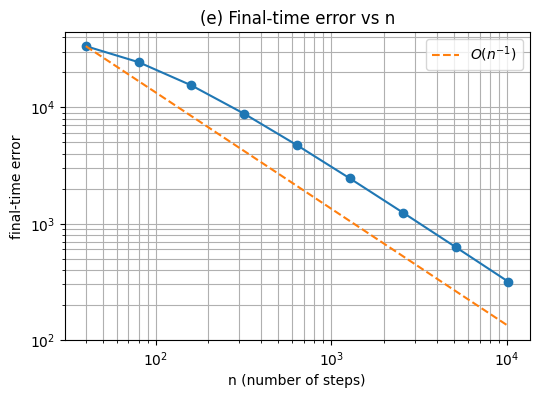

In [6]:
f = lambda x, v: (1.0 + x**2)*v
v_exact = lambda x: np.exp((x**3 + 3.0*x - 4.0)/3.0)
tspan = (1.0, 3.0)

t, v = euler(f, tspan, 1.0, 320)
lineplot(t, v, "(e) Euler solution (n=320)", "x", "v(x)")

ns = [10*(2**k) for k in range(2, 11)]
errs = []
for n in ns:
    t, v = euler(f, tspan, 1.0, n)
    errs.append(abs(v_exact(t[-1]) - v[-1]))
conv_plot(ns, errs, "(e) Final-time error vs n")

## (f) $v' = -(1+x^2)v^2$, $x\in[0,2]$, $v(0)=2$, exact $\hat{v}(x)=6/(2x^3+6x+3)$

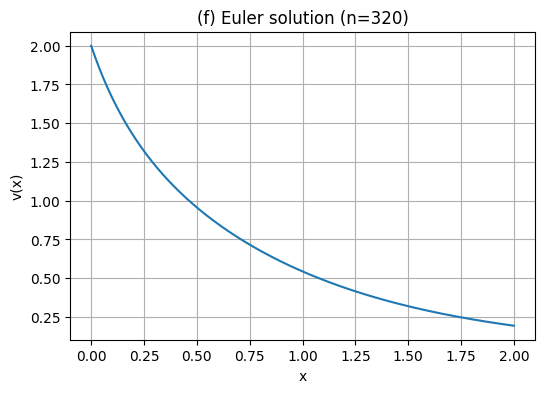

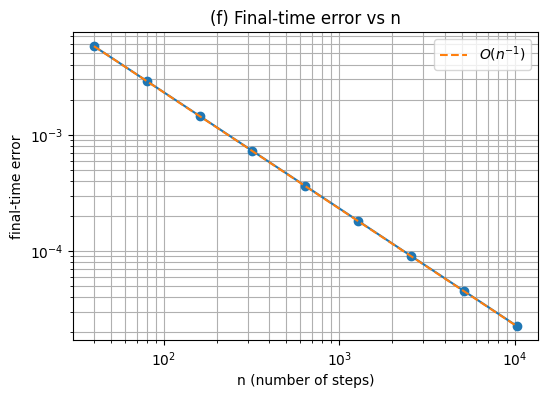

In [7]:
f = lambda x, v: -(1.0 + x**2)*v**2
v_exact = lambda x: 6.0/(2.0*x**3 + 6.0*x + 3.0)
tspan = (0.0, 2.0)

t, v = euler(f, tspan, 2.0, 320)
lineplot(t, v, "(f) Euler solution (n=320)", "x", "v(x)")

ns = [10*(2**k) for k in range(2, 11)]
errs = []
for n in ns:
    t, v = euler(f, tspan, 2.0, n)
    errs.append(abs(v_exact(t[-1]) - v[-1]))
conv_plot(ns, errs, "(f) Final-time error vs n")

## (g) $u' = 2(1+t)(1+u^2)$, $t\in[0,0.5]$, $u(0)=0$, exact $\hat{u}(t)=\tan(2t+t^2)$

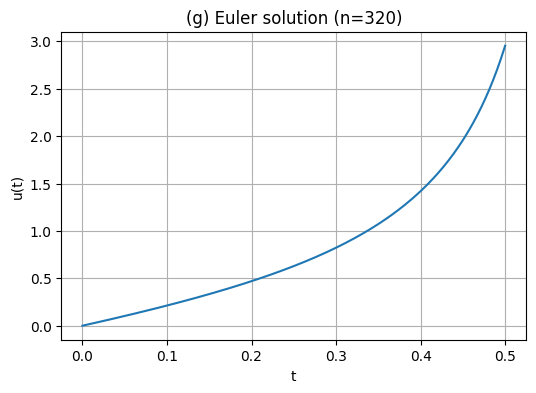

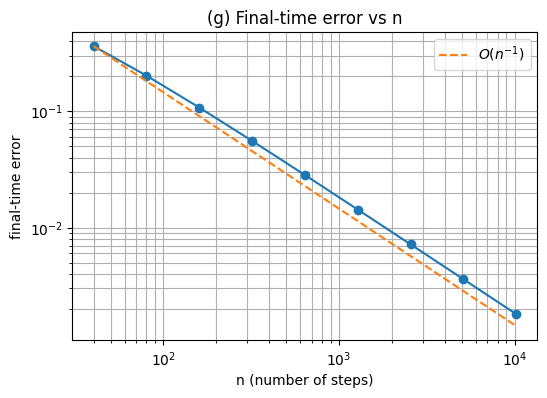

In [8]:
f = lambda t, u: 2.0*(1.0 + t)*(1.0 + u**2)
u_exact = lambda t: np.tan(2.0*t + t**2)
tspan = (0.0, 0.5)

t, u = euler(f, tspan, 0.0, 320)
lineplot(t, u, "(g) Euler solution (n=320)", "t", "u(t)")

ns = [10*(2**k) for k in range(2, 11)]
errs = []
for n in ns:
    t, u = euler(f, tspan, 0.0, n)
    errs.append(abs(u_exact(t[-1]) - u[-1]))
conv_plot(ns, errs, "(g) Final-time error vs n")